**Simple Linear Regression with numpy (Analytical Solution)**

Generate synthetic data and then fill in the blank to calculate the slope and intercept of the best-fit line using the analytical solution (normal equation).

In [8]:
import numpy as np

np.random.seed(0)
X = np.random.rand(50, 1) * 10
y = 2 * X + 5 + np.random.randn(50, 1)

X_b = np.c_[np.ones((50, 1)), X]   # Add bias column

# --- COMPLETE THIS LINE ---
# Use the analytical solution
w_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y


w_0 = w_best[0, 0]   # Intercept
w_1 = w_best[1, 0]   # Slope

print(f"Calculated Intercept (w₀): {w_0:.4f}")
print(f"Calculated Slope (w₁): {w_1:.4f}")


Calculated Intercept (w₀): 4.9928
Calculated Slope (w₁): 1.9693


**Making Predictions**

Complete the function to return the predicted value based on the simple linear regression equation.

In [9]:
# Assume w_0 and w_1 are already defined from the previous question

def predict(x, w_0, w_1):
    # --- COMPLETE THIS LINE ---
    return w_0 + w_1 * x

x_new = 10
predicted_y = predict(x_new, w_0, w_1)

print(f"Predicted value for x={x_new}: {predicted_y:.4f}")

Predicted value for x=10: 24.6855


**Visualizing the Result**

Complete the plotting code to overlay the best-fit regression line on a scatter plot of the original data.

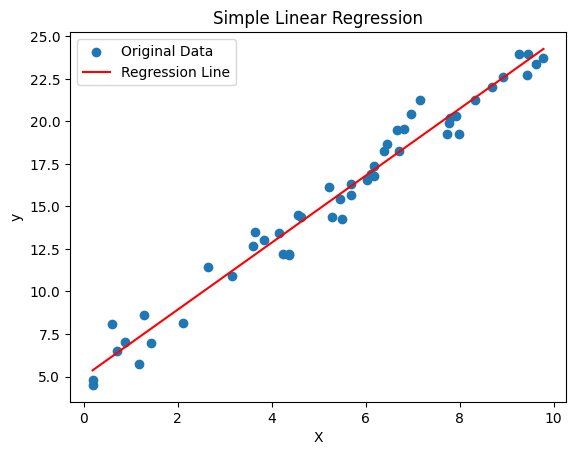

In [10]:
import matplotlib.pyplot as plt

# Assume X, y, w_0, w_1, and predict() are defined

plt.scatter(X, y, label='Original Data')
# --- COMPLETE THIS LINE ---
plt.plot(np.sort(X, axis=0), predict(np.sort(X, axis=0), w_0, w_1), color='red', label='Regression Line')
plt.title("Simple Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

**PyTorch Mini Tutorial**

Use this mini-tutorial to get familiar with pyTorch.

**Tensors (the core building block)**

Think of tensors as PyTorch’s version of NumPy arrays (but they can also run on GPUs).

In [1]:
import torch

# Create tensors
a = torch.tensor([1., 2., 3.])
b = torch.tensor([4., 5., 6.])

# Basic operations
print(a + b)       # element-wise addition
print(a * b)       # element-wise multiplication
print(a @ b)       # dot product (1*4 + 2*5 + 3*6)
print(a.mean())    # mean

tensor([5., 7., 9.])
tensor([ 4., 10., 18.])
tensor(32.)
tensor(2.)


**Gradient computation (autograd)**

PyTorch automatically computes gradients using autograd.

In [2]:
x = torch.tensor(2.0, requires_grad=True)
y = x**2 + 3*x + 1   # a function of x

y.backward()         # compute derivative dy/dx
print(x.grad)        # should print 7 (2*2 + 3)

tensor(7.)


**A simple model (linear regression)**

Let’s fit 𝑦 = 2𝑥 + 3

In [3]:
import torch.nn as nn
import torch.optim as optim

# Data
X = torch.randn(100, 1) * 10
y = 2 * X + 3

# Model
model = nn.Linear(1, 1)              # linear regression

# Loss & optimizer
criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training
for epoch in range(1000):
    y_pred = model(X)
    loss = criterion(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 200 == 0:
        print(f"Epoch {epoch+1}, Loss={loss.item():.4f}")

print("Prediction for x=5:", model(torch.tensor([[5.0]])).item())

Epoch 200, Loss=0.3936
Epoch 400, Loss=0.0056
Epoch 600, Loss=0.0049
Epoch 800, Loss=0.0046
Epoch 1000, Loss=0.0046
Prediction for x=5: 13.00233268737793


**Build your own model (linear regression)**

Next you will be building your own version of linear regression model on pytorch

In [11]:
# --- MAKE THE NECESSARY IMPORTS ---
import torch
import torch.nn as nn
import torch.optim as optim

# --- CREATE SYNTHETIC DATA WITH NOISE ---
torch.manual_seed(0)
X = torch.randn(100, 1) * 10   # 100 data points
y = 3 * X + 4 + torch.randn(100, 1) * 2   # true slope=3, intercept=4, plus noise

# --- DEFINE YOUR MODEL ---
model = nn.Linear(1, 1)  # one input feature -> one output

# --- DEFINE THE LOSS FUNCTION (MEAN SQUARED ERROR) AND OPTIMIZER (SGD) ---
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# --- WRITE THE TRAINING LOOP ---
epochs = 1000
for epoch in range(epochs):
    # forward pass
    y_pred = model(X)
    loss = criterion(y_pred, y)

    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# --- MAKE A SAMPLE PREDICTION FOR A DATA POINT ---
x_new = torch.tensor([[10.0]])
y_pred_new = model(x_new).item()
print(f"Prediction for x=10: {y_pred_new:.4f}")

# Print learned parameters
[w, b] = model.parameters()
print(f"Learned weight (slope): {w.item():.4f}")
print(f"Learned bias (intercept): {b.item():.4f}")

Epoch 100/1000, Loss: 11.1773
Epoch 200/1000, Loss: 8.5958
Epoch 300/1000, Loss: 6.8651
Epoch 400/1000, Loss: 5.7049
Epoch 500/1000, Loss: 4.9271
Epoch 600/1000, Loss: 4.4056
Epoch 700/1000, Loss: 4.0560
Epoch 800/1000, Loss: 3.8217
Epoch 900/1000, Loss: 3.6645
Epoch 1000/1000, Loss: 3.5592
Prediction for x=10: 33.6356
Learned weight (slope): 2.9779
Learned bias (intercept): 3.8571


**Maximum Likelihood Estimation for a Normal Distribution**

Complete the function to calculate the log-likelihood for a normal distribution.

In [4]:
import numpy as np

def log_likelihood(mu, sigma, data):
    n = len(data)
    sigma_sq = sigma**2 + 1e-9

    # --- COMPLETE THIS LINE ---
    log_L = np.sum(np.log(1 / (np.sqrt(2 * np.pi * sigma_sq)) * np.exp(-(data - mu)**2 / (2 * sigma_sq))))
    return log_L

data = np.array([3.5, 4.2, 5.1, 4.8, 5.5])
ll = log_likelihood(mu=4.5, sigma=1.0, data=data)

print(f"Log-likelihood for given parameters: {ll:.4f}")

Log-likelihood for given parameters: -5.8647


**Comparing MLE to Sample Statistics**

Use numpy to calculate the sample mean and standard deviation of the data.

In [5]:
import numpy as np

data = np.array([8.5, 9.2, 10.1, 3.8, 15.5])

# --- COMPLETE THESE LINES ---
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)

print(f"Sample Mean: {sample_mean:.4f}")
print(f"Sample Standard Deviation: {sample_std:.4f}")

Sample Mean: 9.4200
Sample Standard Deviation: 4.1806


**Finding MLE for a Coin Flip**

Find the maximum likelihood estimate for the probability of heads, p, based on the coin flip data.

In [6]:
import numpy as np

coin_flips = np.array([1, 0, 1, 1, 0, 1, 0, 1, 1, 1])

# --- COMPLETE THIS LINE ---
mle_p = np.mean(coin_flips)

print(f"MLE for the probability of heads (p): {mle_p:.2f}")

MLE for the probability of heads (p): 0.70
